# Digit Recognizer

Arun Pandian R.

A Deep Learning CNN based model which can recognize handwritten digits. It is built on machine learning framework Tensorflow along with Keras. The model architecture is slighlty modified version of [LeNet-5](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) Architecture proposed by Yann LeCun in 1998. This is Deep Convolutional Neural Network of 5 layers. This notebook is created in and for running the notebook in [Google Colab](https://colab.research.google.com). It takes approximately 2mins to train on Colab's Tesla GPU which Google offers for free.

## **Table of Contents**


1. **Importing Dependencies**
2. **Data Preparation**
* **2.1 Loading Dataset**
* **2.2 Check for null and missing values**
* **2.3 Normalisation**
* **2.4 Reshape**
* **2.5 Label Encoding**
* **2.6 Train and Validation Data Split**
3. **CNN Model**
* **3.1 Model Architecture Definition**
* **3.2 Optimizer and Annealer Initialisation**
* **3.3 Data Augmentation**
4. **Model Training and Evaluation**
* **4.1 Model Training**
* **4.2 Learning Curve**
* **4.2 Confusion Matrix**
* **4.3 Displaying the errors**
5. **Model Save**








## 1. Importing Dependencies

In [7]:
# Importing Tensorflow and keras
#Keras is built into TF 2.0

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline


np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

#Setting the Theme of the data visualizer Seaborn
sns.set(style="white",context="notebook",palette="deep")

#Tensorflow Version
print("Tensorflow Version:"+tf.version.VERSION)
print("Keras Version      "+tf.keras.__version__)

Tensorflow Version:2.2.0-rc2
Keras Version      2.3.0-tf


##2.Data Preparation

###2.1 Data Loading

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = "xxxxxx" # username from the json file
os.environ['KAGGLE_KEY'] = "xxxxxxxxxxxxxxxxxxxxxx" # key from the json file
!kaggle competitions download -c digit-recognizer
!unzip train.csv.zip

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  train.csv.zip
  inflating: train.csv               


In [0]:
train = pd.read_csv("/content/drive/My Drive/Digit Recognition Project/train.csv")


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

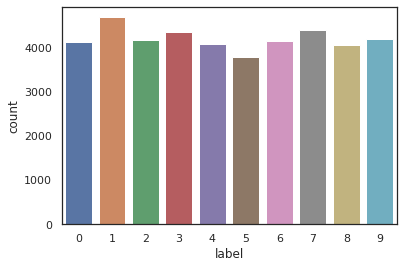

In [0]:
Y_train = train["label"]

#Dropping Label Column
X_train = train.drop(labels=["label"],axis=1)

#free up some space
del train

graph = sns.countplot(Y_train)
 
Y_train.value_counts()

###2.2 Checking for Null or NaN values

In [0]:
#Checking for any null or missing values
X_train.isnull().any().describe()

test.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

###2.3 Normalisation

In [0]:
X_train = X_train/255
test = test/255

###2.4 Reshape

In [0]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

### 2.5 Label Encoding

In [0]:
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)
#To enable label into hot vector. For Eg.7 -> [0,0,0,0,0,0,0,1,0,0]

In [0]:
#Spliting Train and test set

random_seed =2

### 2.6 Train and Validation Dataset Split

In [0]:
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.1,
                                                random_state = random_seed)


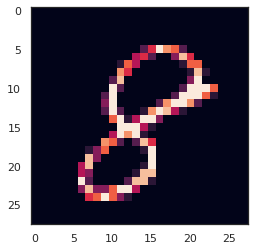

In [0]:
#Show some example 

g = plt.imshow(X_train[0][:,:,0])

##3.CNN Model

### 3.1 Model architecture Definition

In [0]:
#CNN Architecture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> 
                           #Flatten -> Dense -> Dropout -> Out
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10,activation=tf.nn.softmax))

### 3.2 Optimiser and Annealer Initialisation

In [0]:
#Defining Optimizer

optimizer = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


In [0]:
#Compiling Model

model.compile(optimizer = optimizer, loss='categorical_crossentropy', 
             metrics=["accuracy"])  

In [0]:
#Setting Learning rate annealer

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

In [0]:
epochs=30
batch_size = 86
print(X_train.shape[0])

37800


### 3.3 Data Augmentation

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

## 4. Model Training and Evaluation

### 4.1 Model Training

In [0]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
439/439 [==============================] - 36s 83ms/step - loss: 0.3727 - acc: 0.8808 - val_loss: 0.0585 - val_acc: 0.9814
Epoch 2/30
439/439 [==============================] - 29s 67ms/step - loss: 0.1065 - acc: 0.9691 - val_loss: 0.0344 - val_acc: 0.9879
Epoch 3/30
439/439 [==============================] - 30s 68ms/step - loss: 0.0772 - acc: 0.9757 - val_loss: 0.0377 - val_acc: 0.9879
Epoch 4/30
439/439 [==============================] - 30s 68ms/step - loss: 0.0657 - acc: 0.9798 - val_loss: 0.0341 - val_acc: 0.9905
Epoch 5/30
439/439 [==============================] - 30s 67ms/step - loss: 0.0578 - acc: 0.9827 - val_loss: 0.0271 - val_acc: 0.9914
Epoch 6/30
439/439 [==============================] - 29s 66ms/step - loss: 0.0546 - acc: 0.9841 - val_loss: 0.0207 - val_acc: 0.9933
Epoch 7/30
439/439 [==============================] - 30s 69ms/step - loss: 0.0515 - acc: 0.9850 - val

### 4.2 Learning Curve

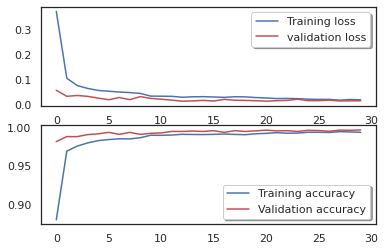

In [0]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### 4.3 Confusion Matrix Plotting
It is used for grphical representation of performance of the model. It shows the performance of Model in predicting every class.

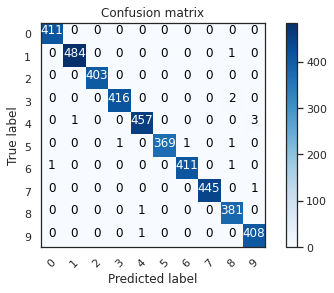

In [0]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

### 4.4 Displaying Errors

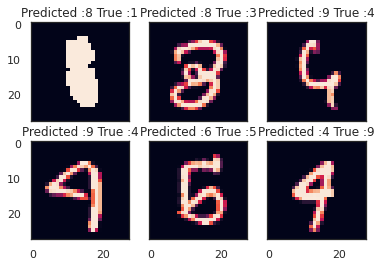

In [0]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted :{} True :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

## 5. Model Saving

In [0]:
model.save('model_python.hdf5')

In [0]:
!pip install tensorflowjs
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, '/content/models')